# Bandwidth Analysis

Basic visualization and summary statistics from bandwidth monitor data

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, mpld3
%matplotlib inline
mpld3.enable_notebook()

## Bandwidth

### Import Data

In [2]:
bandwidth=pd.read_csv('speedtest.csv')
bandwidth.head(10)

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload
0,10602,Aspire Technology Solutions,Gateshead,2018-04-01T18:42:03.020515,50.827748,48.377,5.888372e+06,5.121314e+06
1,16353,ITPS Ltd,Newcastle Upon Tyne,2018-04-01T19:42:03.281360,53.147594,52.077,4.786728e+06,4.315347e+06
2,4068,Bytemark Hosting,York,2018-04-01T20:42:03.728437,68.538991,44.386,5.042936e+06,5.660479e+06
3,4068,Bytemark Hosting,York,2018-04-01T21:42:03.634383,68.538991,33.350,5.063280e+06,4.984996e+06
4,10580,aql,Leeds,2018-04-01T22:42:03.429437,88.480717,37.735,6.241622e+06,6.002154e+06
5,10580,aql,Leeds,2018-04-01T23:42:02.962823,88.480717,39.585,5.607967e+06,5.817810e+06
6,10602,Aspire Technology Solutions,Gateshead,2018-04-02T00:42:02.848820,50.827748,34.956,8.094414e+06,6.028366e+06
7,16379,HostYourNet,Middlesbrough,2018-04-02T01:42:03.340592,4.656257,38.219,3.681207e+06,5.937033e+06
8,4068,Bytemark Hosting,York,2018-04-02T02:42:03.589503,68.538991,40.908,6.680327e+06,5.862444e+06
9,4068,Bytemark Hosting,York,2018-04-02T03:42:03.031497,68.538991,30.984,7.221327e+06,5.979748e+06


### Parse data

Parse data to timestamps and mbps units:

In [3]:
bandwidth.Timestamp = pd.to_datetime(bandwidth.Timestamp)
bandwidth.Download = bandwidth.Download/(1024*1024)
bandwidth.Upload = bandwidth.Upload/(1024*1024)
bandwidth.head(10)

,Server ID,Sponsor,Server Name,Timestamp,Distance,Ping,Download,Upload
0,10602,Aspire Technology Solutions,Gateshead,2018-04-01 18:42:03.020515,50.827748,48.377,5.615589,4.884066
1,16353,ITPS Ltd,Newcastle Upon Tyne,2018-04-01 19:42:03.281360,53.147594,52.077,4.564979,4.115436
2,4068,Bytemark Hosting,York,2018-04-01 20:42:03.728437,68.538991,44.386,4.809318,5.398253
3,4068,Bytemark Hosting,York,2018-04-01 21:42:03.634383,68.538991,33.350,4.828720,4.754063
4,10580,aql,Leeds,2018-04-01 22:42:03.429437,88.480717,37.735,5.952475,5.724100
5,10580,aql,Leeds,2018-04-01 23:42:02.962823,88.480717,39.585,5.348174,5.548296
6,10602,Aspire Technology Solutions,Gateshead,2018-04-02 00:42:02.848820,50.827748,34.956,7.719434,5.749098
7,16379,HostYourNet,Middlesbrough,2018-04-02 01:42:03.340592,4.656257,38.219,3.510673,5.661996
8,4068,Bytemark Hosting,York,2018-04-02 02:42:03.589503,68.538991,40.908,6.370856,5.590862
9,4068,Bytemark Hosting,York,2018-04-02 03:42:03.031497,68.538991,30.984,6.886794,5.702732


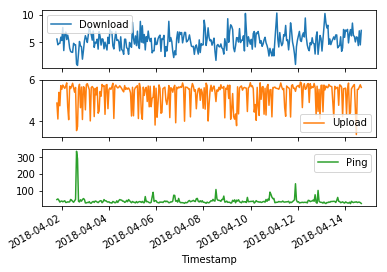

In [44]:
axes = bandwidth[['Timestamp','Download','Upload','Ping']].plot(x='Timestamp',subplots=True)

### Summary statistics and plots

In [59]:
bandwidth['Download_mean']=bandwidth.Download.mean()
bandwidth['Upload_mean']=bandwidth.Upload.mean()
bandwidth['ping_mean']=bandwidth.Ping.mean()

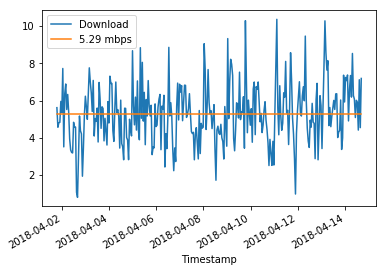

In [57]:
ax = bandwidth[['Timestamp','Download','Download_mean']].plot(x='Timestamp')
ax.legend(['Download',f'{bandwidth.Download.mean():.2f} mbps'])

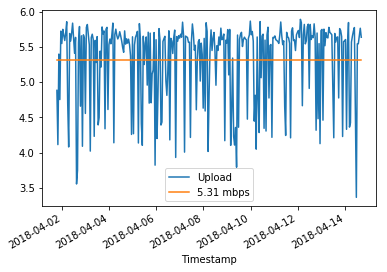

In [58]:
ax = bandwidth[['Timestamp','Upload','Upload_mean']].plot(x='Timestamp')
ax.legend(['Upload',f'{bandwidth.Upload.mean():.2f} mbps'])

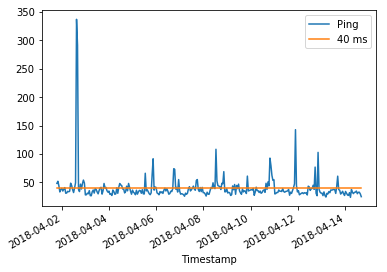

In [62]:
ax = bandwidth[['Timestamp','Ping','ping_mean']].plot(x='Timestamp')
ax.legend(['Ping',f'{bandwidth.Ping.mean():.0f} ms'])

## Latency

### Import data

In [63]:
latency=pd.read_csv('latency.csv')
latency.head(10)

,timestamp,latency(ms)
0,2018-04-01T19:42:45,19.408
1,2018-04-01T20:42:47,21.975
2,2018-04-01T21:42:45,19.633
3,2018-04-01T22:42:48,19.760
4,2018-04-01T23:42:43,28.615
5,2018-04-02T00:42:43,17.161
6,2018-04-02T01:42:43,18.782
7,2018-04-02T02:42:46,15.683
8,2018-04-02T03:42:43,15.433
9,2018-04-02T04:42:42,20.189


### Parse data

In [66]:
latency.timestamp = pd.to_datetime(latency.timestamp)
latency.head(10)

,timestamp,latency(ms)
0,2018-04-01 19:42:45,19.408
1,2018-04-01 20:42:47,21.975
2,2018-04-01 21:42:45,19.633
3,2018-04-01 22:42:48,19.760
4,2018-04-01 23:42:43,28.615
5,2018-04-02 00:42:43,17.161
6,2018-04-02 01:42:43,18.782
7,2018-04-02 02:42:46,15.683
8,2018-04-02 03:42:43,15.433
9,2018-04-02 04:42:42,20.189


### Summary statistics and plots

In [69]:
mean = latency['latency(ms)'].mean()
latency['mean']=mean

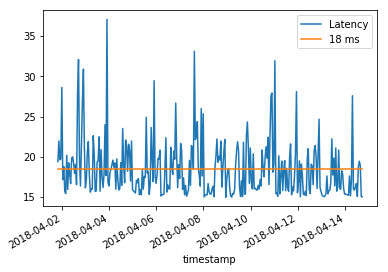

In [70]:
ax = latency[['timestamp','latency(ms)','mean']].plot(x='timestamp')
ax.legend(['Latency',f'{mean:.0f} ms'])